In [ ]:
import pandas as pd


In [ ]:
df = pd.read_csv('FinalDataset.tsv', delimiter='\t', error_bad_lines=False)



<ipython-input-4-b2a634bbe298>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('FinalDataset.tsv', delimiter='\t', error_bad_lines=False)
Skipping line 17089: expected 15 fields, saw 22



In [ ]:
print(df.columns)


Index(['marketplace', 'customer_id', 'review_id', 'product_id',
       'product_parent', 'product_title', 'product_category', 'star_rating',
       'helpful_votes', 'total_votes', 'vine', 'verified_purchase',
       'review_headline', 'review_body', 'review_date'],
      dtype='object')


In [ ]:
num_reviews = len(df)
print(f"Number of reviews: {num_reviews}")


Number of reviews: 19945


In [ ]:
# Convert the 'date' column to datetime format
df['review_date'] = pd.to_datetime(df['review_date'])

# Find the earliest and latest date
start_date = df['review_date'].min()
end_date = df['review_date'].max()

print(f"Date range of reviews: {start_date} to {end_date}")


Date range of reviews: 2015-06-04 00:00:00 to 2015-08-31 00:00:00


In [ ]:
# For product_id
num_unique_products = df['product_category'].nunique()
print(f"Number of unique products: {num_unique_products}")

# For category (if available)
num_unique_categories = df['product_category'].nunique()
print(f"Number of unique categories: {num_unique_categories}")


Number of unique products: 5
Number of unique categories: 5


In [ ]:
import matplotlib.pyplot as plt


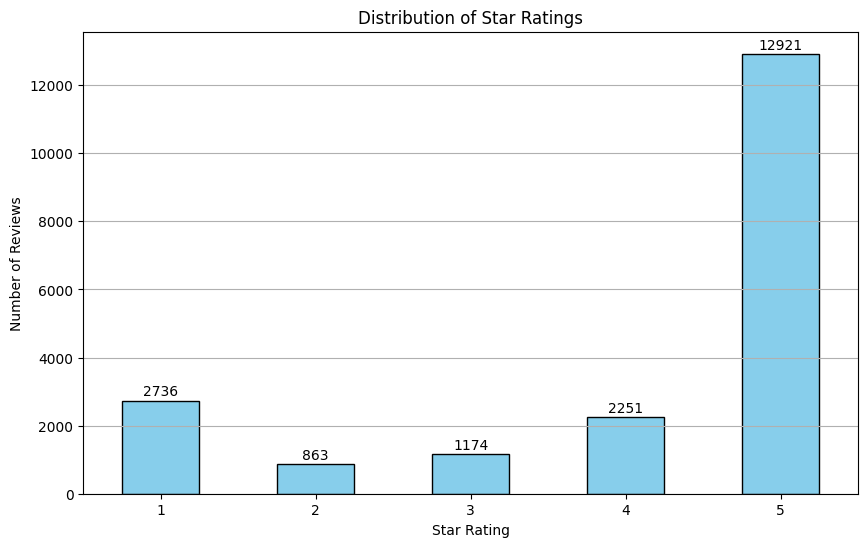

In [ ]:
# Plotting the bar chart for star ratings
bars = df['star_rating'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black', figsize=(10, 6))
plt.title('Distribution of Star Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Adding labels to the bars
for bar in bars.patches:
    yval = bar.get_height()
    bars.text(bar.get_x() + bar.get_width()/2, yval + 50, round(yval, 2), ha='center', va='bottom', fontsize=10, color='black')



In [ ]:
# Calculating and displaying descriptive statistics for star ratings
mean_rating = df['star_rating'].mean()
median_rating = df['star_rating'].median()
mode_rating = df['star_rating'].mode()[0]  # mode() returns a Series, so we take the first value

print(f"Mean Star Rating: {mean_rating:.2f}")
print(f"Median Star Rating: {median_rating}")
print(f"Mode Star Rating: {mode_rating}")


Mean Star Rating: 4.09
Median Star Rating: 5.0
Mode Star Rating: 5


In [ ]:
import seaborn as sns

In [ ]:
# Check for missing values in 'review_body' and 'star_ratings'
missing_review_body = df['review_body'].isnull().sum()
missing_star_ratings = df['star_rating'].isnull().sum()

print(f"Missing values in 'review_body': {missing_review_body}")
print(f"Missing values in 'star_rating': {missing_star_ratings}")


Missing values in 'review_body': 0
Missing values in 'star_rating': 0


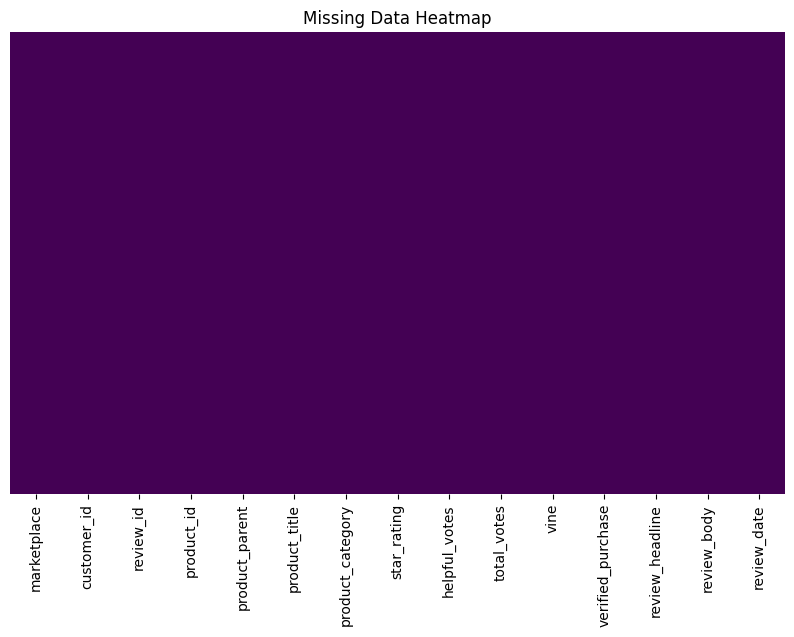

In [ ]:
# Plotting a heatmap to visualize missing data
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Data Heatmap')
plt.show()


In [ ]:
# Calculate the percentage of missing values for each column
missing_percentage = df.isnull().mean() * 100
missing_data = pd.DataFrame({'Column Name': df.columns,
                            'Percentage Missing': missing_percentage})

print(missing_data)


                         Column Name  Percentage Missing
marketplace              marketplace            0.000000
customer_id              customer_id            0.000000
review_id                  review_id            0.000000
product_id                product_id            0.000000
product_parent        product_parent            0.000000
product_title          product_title            0.000000
product_category    product_category            0.000000
star_rating              star_rating            0.000000
helpful_votes          helpful_votes            0.000000
total_votes              total_votes            0.000000
vine                            vine            0.000000
verified_purchase  verified_purchase            0.000000
review_headline      review_headline            0.005014
review_body              review_body            0.000000
review_date              review_date            0.000000


In [ ]:
from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
def infer_sentiment(rating):
    if rating >= 4:
        return 'positive'
    elif rating == 3:
        return 'neutral'
    else:
        return 'negative'

df['sentiment'] = df['star_rating'].apply(infer_sentiment)


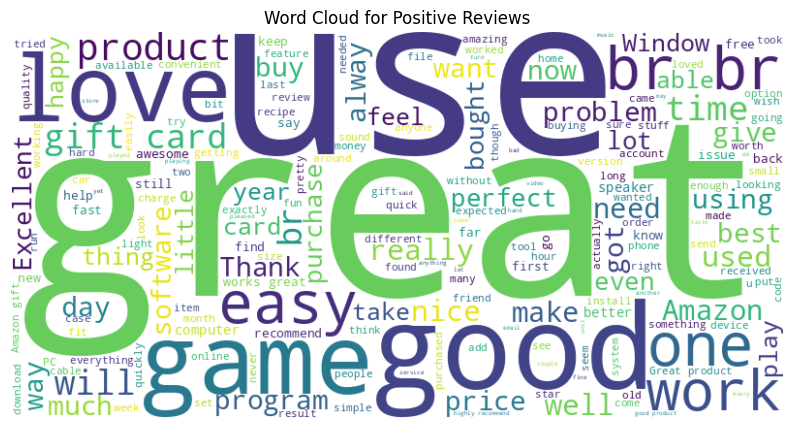

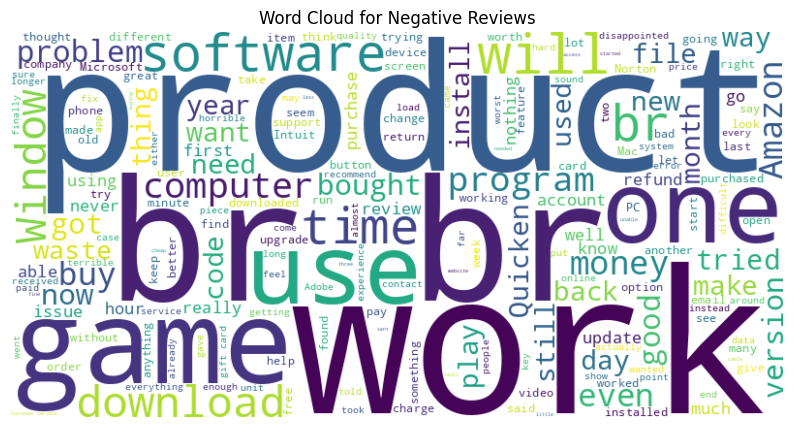

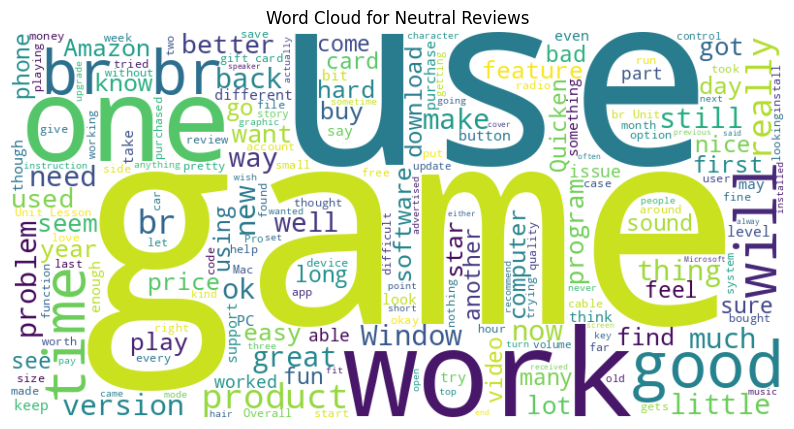

In [ ]:
# Function to generate a word cloud
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Generate word clouds for each sentiment category
for sentiment in ['positive', 'negative', 'neutral']:
    text = ' '.join(df[df['sentiment'] == sentiment]['review_body'].dropna())
    generate_wordcloud(text, f'Word Cloud for {sentiment.capitalize()} Reviews')


In [ ]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

[nltk_data] Downloading package wordnet to /root/nltk_data...


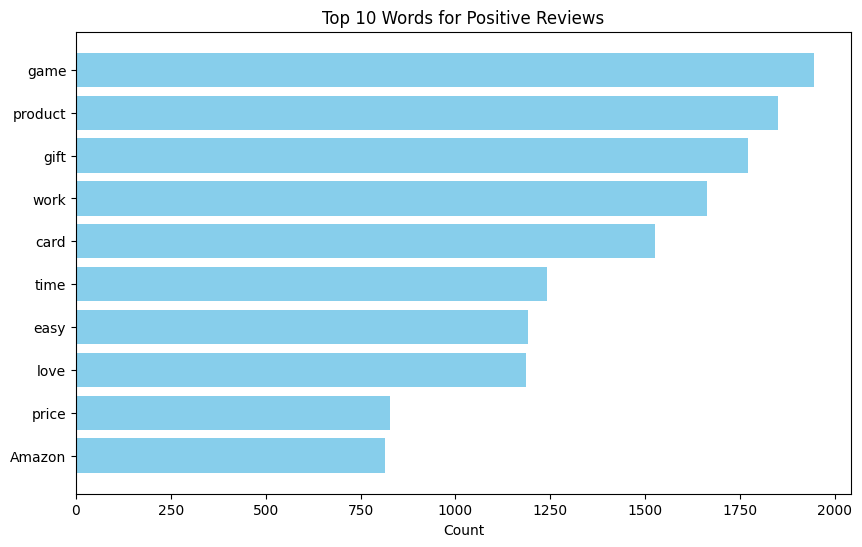

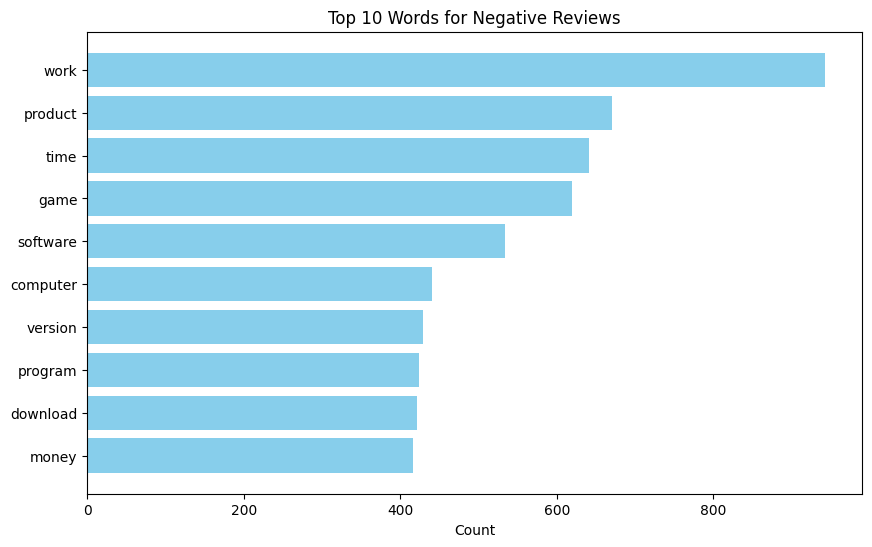

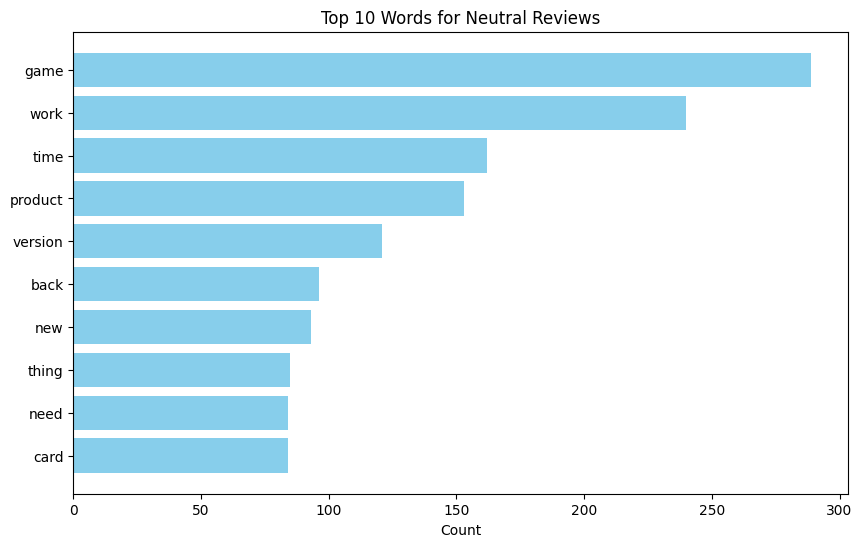

In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Expand the stopwords list
expanded_stopwords = set(stopwords.words('english')).union({"one", "two", "get", "like", "use", "also", "really", "would", "good", "great", "much", "well", "make", "even", "see", "way"})

# Function to plot top-n words
def plot_top_n_words(text, n, title):
    tokens = nltk.word_tokenize(text)
    # Lemmatize, filter out tokens with non-alphabetic characters, stopwords, and short words
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalpha() and word.lower() not in expanded_stopwords and len(word) > 2]
    freq = Counter(tokens)
    top_words = freq.most_common(n)
    words, counts = zip(*top_words)

    plt.figure(figsize=(10, 6))
    plt.barh(words, counts, color='skyblue')
    plt.xlabel('Count')
    plt.title(title)
    plt.gca().invert_yaxis()  # To display the highest frequency word at the top
    plt.show()

# Plot top-n words for each sentiment category
n = 10  # Change this value for a different number of top words
for sentiment in ['positive', 'negative', 'neutral']:
    text = ' '.join(df[df['sentiment'] == sentiment]['review_body'].dropna())
    plot_top_n_words(text, n, f'Top {n} Words for {sentiment.capitalize()} Reviews')




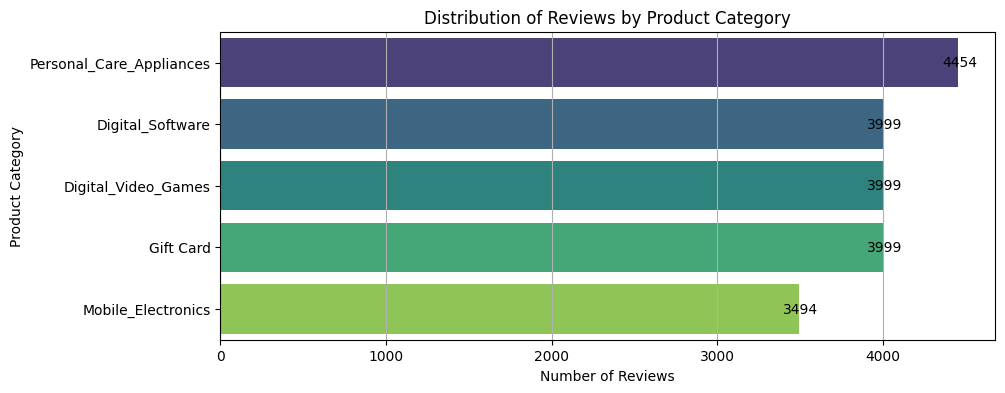

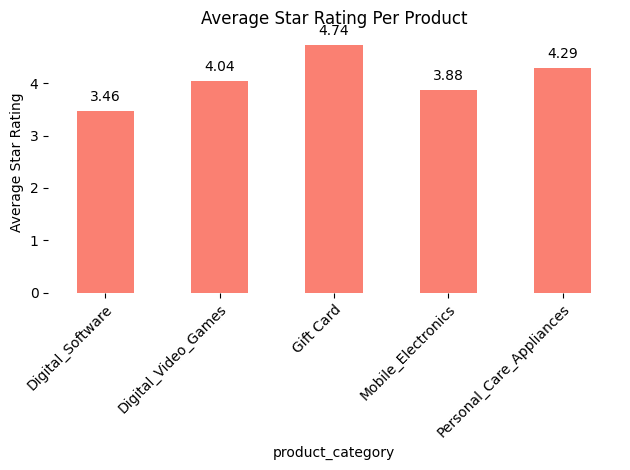

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.util import ngrams
from collections import Counter

# Assuming your product or category column is named 'product'
# If not, replace 'product' with the appropriate column name

plt.figure(figsize=(10, 4))
bars = sns.countplot(y=df['product_category'], order=df['product_category'].value_counts().index, palette='viridis')
plt.title('Distribution of Reviews by Product Category')
plt.xlabel('Number of Reviews')
plt.ylabel('Product Category')
plt.grid(axis='x')

# Add labels on each bar
for p in bars.patches:
    width = p.get_width()    # get bar length
    bars.text(width + 10,       # set the text at 10 units right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.0f}'.format(width), # set variable to display, 2 decimals
            ha = 'center',   # horizontal alignment
            va = 'center')  # vertical alignment

plt.show()

# Average star rating per product
product_avg_rating = df.groupby('product_category')['star_rating'].mean()
ax2 = product_avg_rating.plot(kind='bar', color='salmon', edgecolor='none')
plt.title('Average Star Rating Per Product')
plt.xlabel('product_category')
plt.ylabel('Average Star Rating')
for spine in ax2.spines.values():
    spine.set_visible(False)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right', fontsize=10, wrap=True)
for p in ax2.patches:
    ax2.annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.tight_layout()
plt.show()



In [ ]:

# N-gram Analysis
tokens = nltk.word_tokenize(' '.join(df['review_body'].dropna()))
bigrams = list(ngrams(tokens, 2))
trigrams = list(ngrams(tokens, 3))

# Top 10 bigrams
bigram_counts = Counter(bigrams)
common_bigrams = bigram_counts.most_common(10)
print("Top 10 Bigrams:", common_bigrams)

# Top 10 trigrams
trigram_counts = Counter(trigrams)
common_trigrams = trigram_counts.most_common(10)
print("Top 10 Trigrams:", common_trigrams)


Top 10 Bigrams: [(('.', 'I'), 7031), (('<', 'br'), 6614), (('br', '/'), 6614), (('/', '>'), 6614), (('.', 'It'), 2646), (('>', '<'), 2270), (('.', 'The'), 2261), (('&', '#'), 2251), (('#', '34'), 2229), (('34', ';'), 2229)]
Top 10 Trigrams: [(('<', 'br', '/'), 6614), (('br', '/', '>'), 6614), (('/', '>', '<'), 2270), (('>', '<', 'br'), 2270), (('&', '#', '34'), 2229), (('#', '34', ';'), 2229), (('!', '!', '!'), 967), (('.', 'I', 'have'), 761), (('/', '>', 'I'), 590), (('.', 'It', "'s"), 538)]


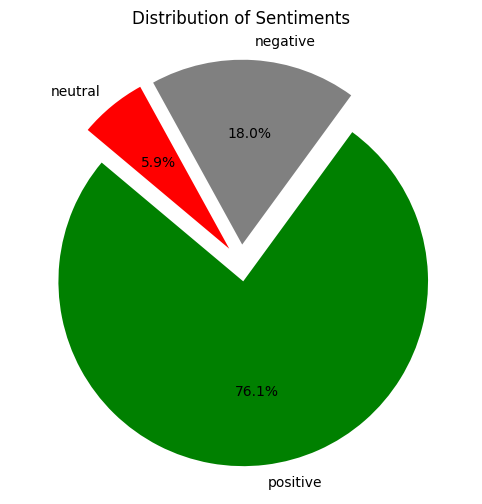

In [ ]:
# Calculate sentiment distribution
sentiment_counts = df['sentiment'].value_counts()

# Plot
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['green', 'gray', 'red'], explode=(0.1, 0.1, 0.1))
plt.title('Distribution of Sentiments')
plt.ylabel('')  # Hide the 'sentiment' ylabel
plt.show()